# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import functions

# Nagel Schreckenberg simulation

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\sofia\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\sofia\AppData\Local\Temp\ipykernel_19084\2699928782.py", line 9, in <module>
    functions.plot_simulation(simulation)
  File "c:\1 Sofia Hilma Nora Tavitian\Traffic_simulation\Traffic_flow_simulation\functions.py", line 93, in plot_simulation
  File "c:\Users\sofia\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py", line 689, in text
    t = mtext.Text(x, y, text=s, **effective_kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sofia\anaconda3\Lib\site-packages\matplotlib\_api\deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sofia\anaconda3\Lib\site-packages\matplotlib\text.py", line 168, in __init__
    self._reset_visual_defaults(
  File "c:\Users\sofia\anaconda3\Lib\site

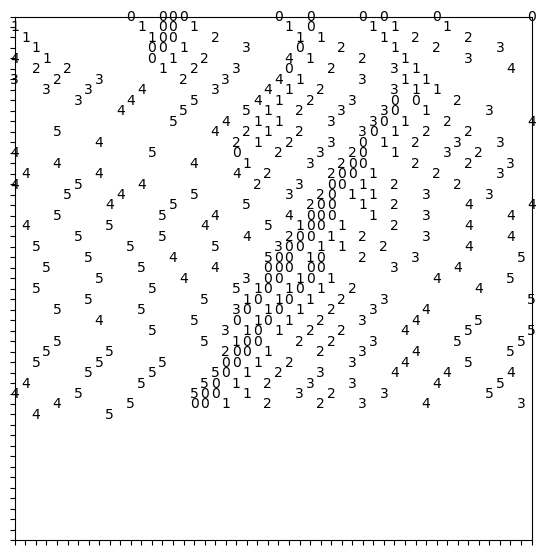

In [7]:
tmax = 50
L = 50
N = 10
vmax = 5
p_to_break = 0.2
prob_slow = 0.5

simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[0]
functions.plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

# Flow vs density

The time-averaged flow q between i and i+1 is:

$q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

The density p on a fixed site i averaged over a time period T:

$p = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i}(t)$

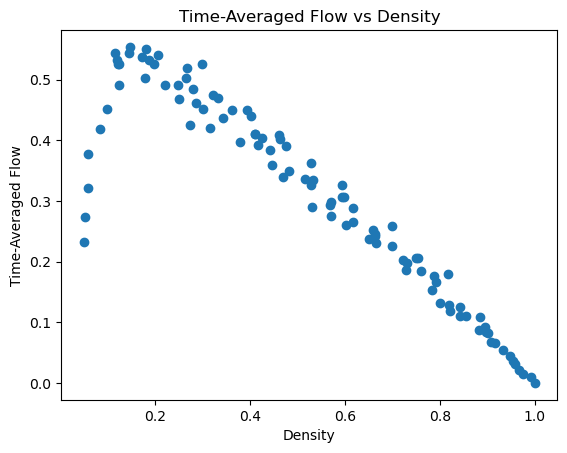

In [ ]:
# Parameters
L = 500  
t_max = 500 
v_max = 5
p = 0.2
N = 10

# Evenly spaced density values
densities = np.linspace(0.05, 1, 100)

flow_vs_density = []
car_densities = []

for density in densities:
    single_cell_flow = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[4]
    car_density = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[3]
    
    final_single_cell_flow = single_cell_flow/t_max
    final_car_density = car_density/t_max

    flow_vs_density.append(final_single_cell_flow)
    car_densities.append(final_car_density)

# Plotting
plt.scatter(car_densities, flow_vs_density) # Not sure whether to use car_densities or densities here
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.show()




# Cluster distribution 

(a way of measuring the amount of traffic)

The below plot (visually) shows that the clusters fluctuate a lot but overall neither increase nor decrease.

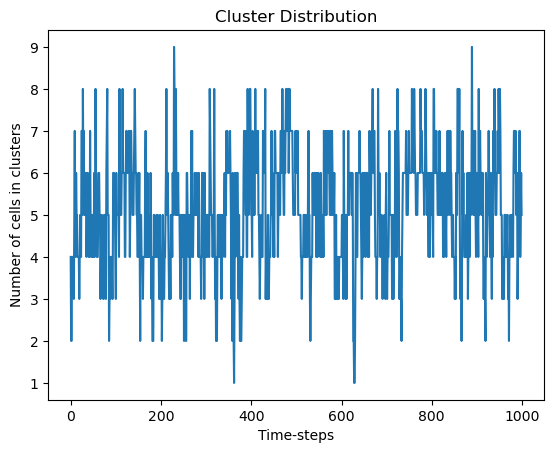

The average number of cells in clusters at one time is 5.067 .
This corresponds to 50.67 percent of cars stuck in traffic.


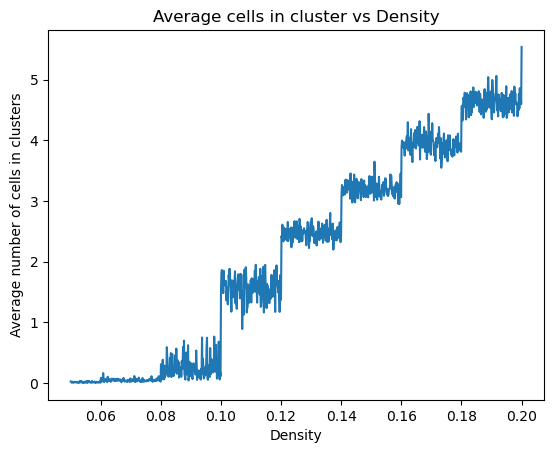

In [ ]:
# Parameters
L = 50  
N = 10
v_max = 5
p = 0.8
t_max = 1000

cluster_distribution = functions.Nagel_Schreckenberg(L, N, v_max, p, t_max)[2]
    
# Plotting
plt.plot(range(t_max), cluster_distribution)
plt.xlabel('Time-steps')
plt.ylabel('Number of cells in clusters')
plt.title('Cluster Distribution')
plt.show()



'''Average number of clusters and its variation for a fixed density'''

# Calculate the average
average_cells_in_clusters = np.mean(cluster_distribution)
percentage_in_traffic = 100*average_cells_in_clusters/N

print("The average number of cells in clusters at one time is", average_cells_in_clusters,".") 
print("This corresponds to", percentage_in_traffic, "percent of cars stuck in traffic.")

# Calculate the variance
variance = np.var(cluster_distribution)





Histogram of cluster distribution for a single density

Plot of cluster averages and their variances over varied densities

In [ ]:

'''Plot of cluster averages and their variances over varied densities
-> i still gotta add the variance:)
'''

densities = np.linspace(0.05, 0.2, 1000)

cluster_averages = []

for density in densities:
    cluster_list = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[2]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)

# Plotting
plt.plot(densities, cluster_averages)
plt.xlabel('Density')
plt.ylabel('Average number of cells in clusters')
plt.title('Average cells in cluster vs Density')
plt.show()
